In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

%matplotlib inline


In [ ]:
file_path= '/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold8/207214-2-0-126.wav'
y, sr = librosa.load(file_path)

print(f"Sample rate: {sr}")
print(f"Audio shape: {y.shape}")

Sample rate: 22050
Audio shape: (88200,)


In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(file_path)


In [ ]:
wave_sample_rate

48000

In [ ]:
wave_audio.shape

(192000, 2)

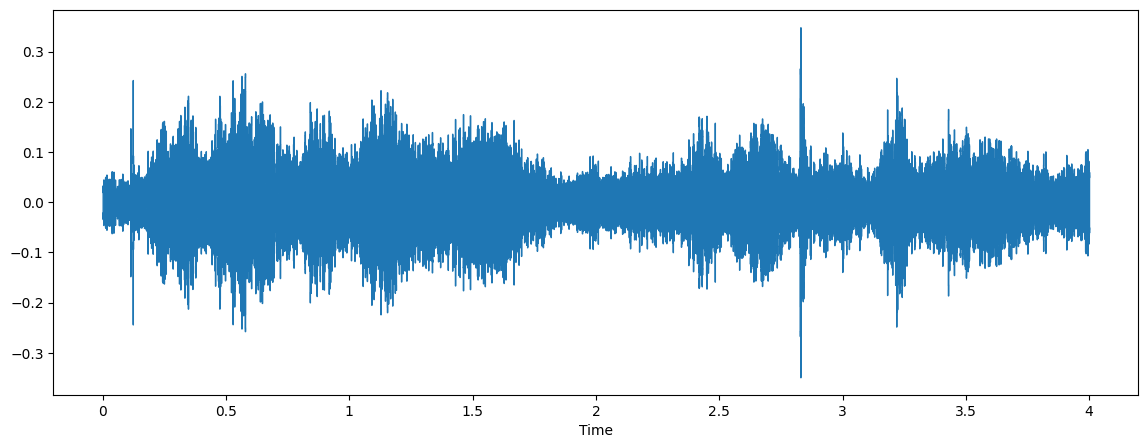

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(file_path)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(file_path)

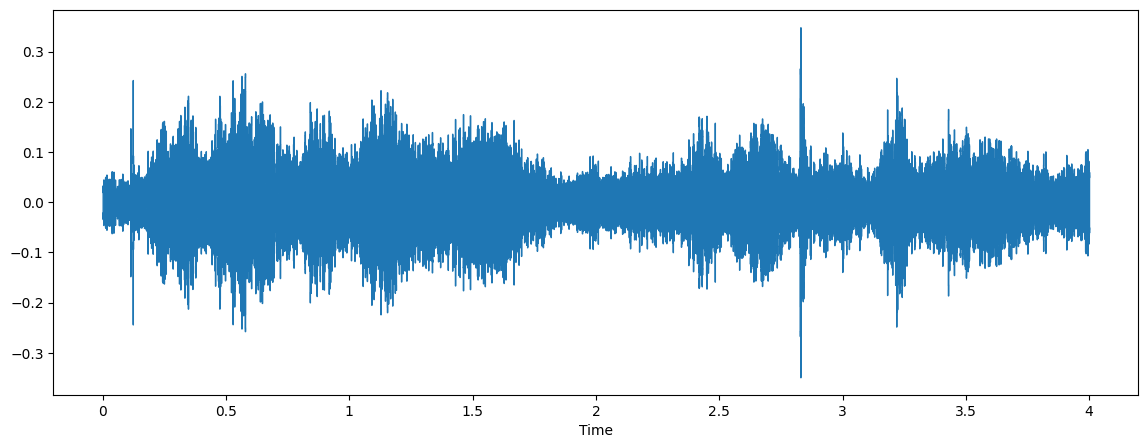

In [ ]:
filepath= '/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold9/189988-0-0-2.wav'
plt.figure(figsize=(14,5))
data2,sample_rate2=librosa.load(filepath)
librosa.display.waveshow(data,sr=sample_rate2)
ipd.Audio(filepath)

In [ ]:
import pandas as pd
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
print(metadata.head())
print(metadata['class'].value_counts())


      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64


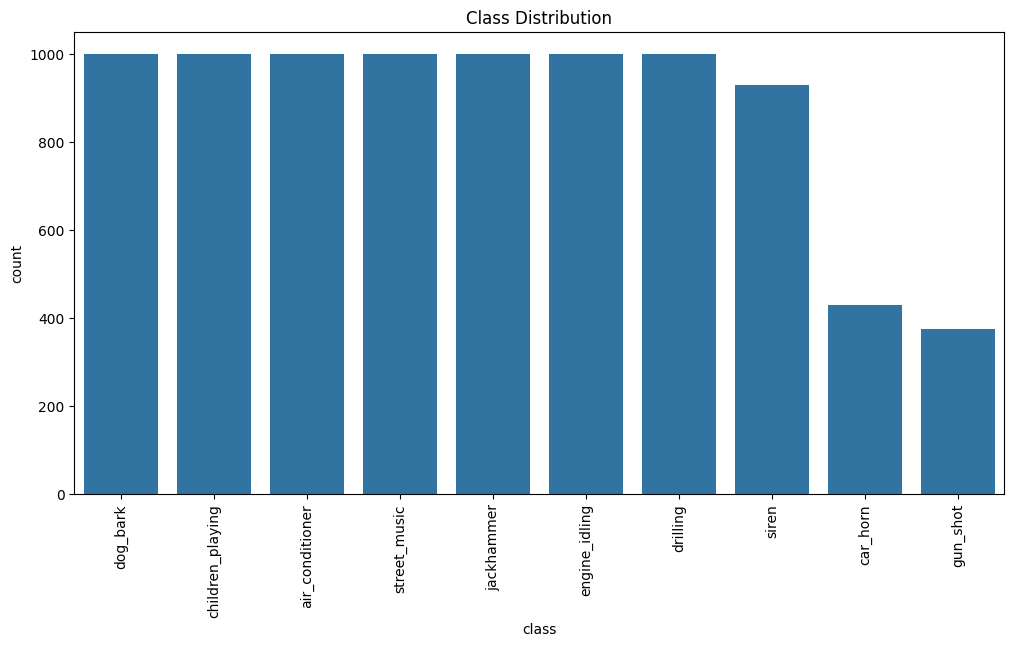

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=metadata, x='class', order=metadata['class'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Class Distribution")
plt.show()

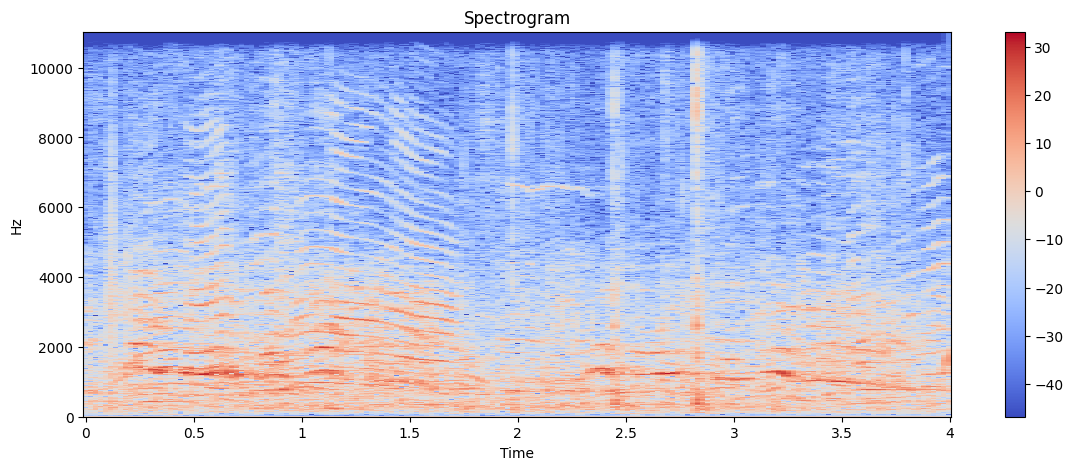

In [ ]:
import numpy as np

X = librosa.stft(data)
X_db = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.show()


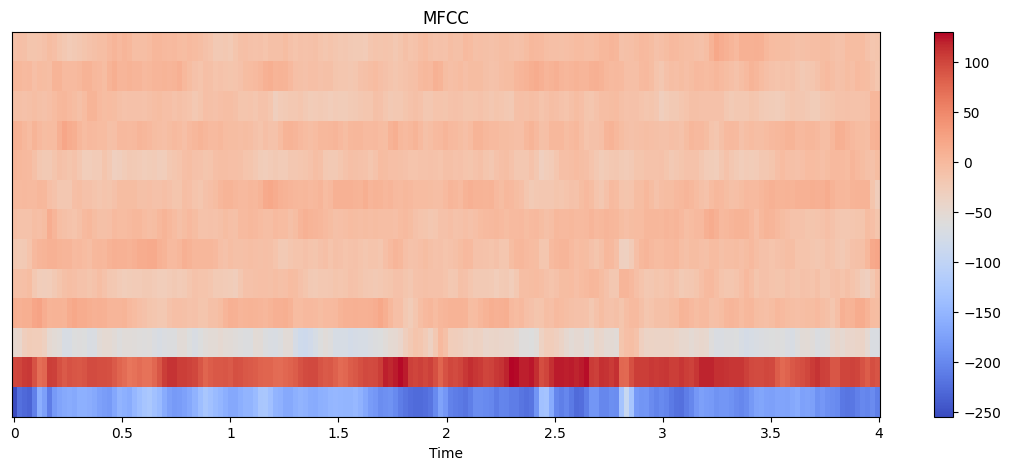

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()


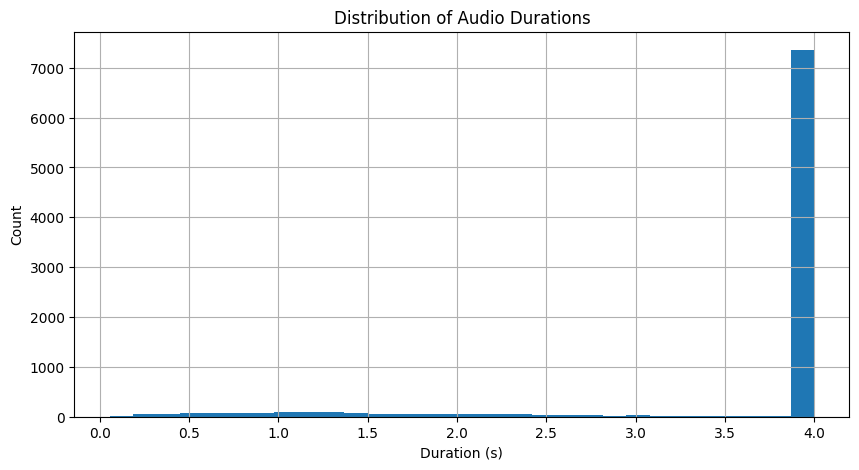

In [ ]:
metadata['duration'] = metadata['end'] - metadata['start']
metadata['duration'].hist(bins=30, figsize=(10,5))
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.show()


In [ ]:
import os
import librosa
import pandas as pd
from tqdm import tqdm

lengths = []
file_path = "/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio"


for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(file_path, 'fold' + str(row["fold"]), str(row["slice_file_name"]))

    try:
        audio, sr = librosa.load(file_name, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        lengths.append(mfccs.shape[1])  # time dimension
    except Exception as e:
        print(f"Error processing file: {file_name} — {e}")

# Now inspect the lengths
import numpy as np
if len(lengths) > 0:
    print("Max time steps:", np.max(lengths))
    print("Mean time steps:", np.mean(lengths))
    print("Median time steps:", np.median(lengths))
else:
    print("The 'lengths' array is empty. No statistics to display.")


2850it [21:33,  1.88it/s]/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
8732it [1:04:59,  2.24it/s]

Max time steps: 1501
Mean time steps: 340.21346770499315
Median time steps: 345.0


In [ ]:
max_len = int(np.percentile(lengths, 90))  # e.g., if it's 600


In [ ]:
max_len

376